## Tutorial 2: Linear filters


In this tutorial, we will recall the concepts:

1. The dual nature of images as matrix representation and topographic maps

2. Visualization and gray level rescaling

3. Photometric & spatial image resolution

4. Histogram - what is it about and how to apply it. In which library to find it.

5. Convolution - masks, application

6. Image noise - kind, parameters

7. Gaussian filtering: kernels with different sigma

8. Mean vs median image filtering


(187, 269, 3) uint8 255 0


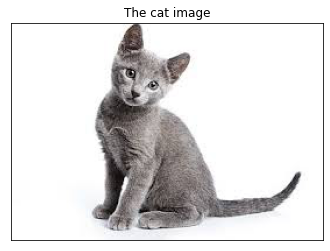

In [47]:
from skimage import io
from matplotlib import pyplot as plt

#Read the image graycat.jpeg
catRGB=io.imread('images/graycat.jpeg')

#check its dimensions, max and min pixel value and type
print(catRGB.shape, catRGB.dtype, catRGB.max(), catRGB.min())

#Visualize it
plt.imshow(catRGB)
plt.title('The cat image')
plt.xticks([])
plt.yticks([])
#plt.axis('off') #alternative
plt.show()

**If not gray, convert it to gray level image**

What is the command to convert rgb to gray and where is it?

Did it change its type?
Did it change its range?

Type:  float64  min:  0.0008333333333333333  max:  1.0


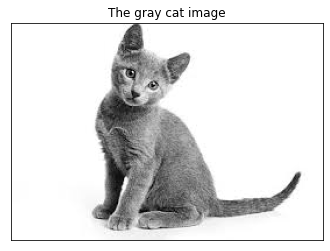

In [48]:
from skimage.color import rgb2gray

cat=rgb2gray(catRGB)

#Visualize it
plt.imshow(cat, cmap='gray')
plt.title('The gray cat image')
plt.xticks([])
plt.yticks([])

print('Type: ', cat.dtype, ' min: ', cat.min(), ' max: ', cat.max())

We need to process the image so better cast it to float, but we don't need 64 bits per pixel. So **let's cast it to float16.**

How many ways there are to cast an image to float?

In [49]:
print('Graylevel image: ', cat.shape, cat.dtype, cat.min(), cat.max())

#cast it to foat16
cat.astype('float16') #Does it change the variable?
print(cat.shape, cat.dtype, cat.min(), cat.max())

catf = cat.astype('float16')
print(catf.shape, catf.dtype, catf.min(), catf.max())
#Explain it

Graylevel image:  (187, 269) float64 0.0008333333333333333 1.0
(187, 269) float64 0.0008333333333333333 1.0
(187, 269) float16 0.0008335 1.0


In [50]:
from skimage import img_as_float

catfl = img_as_float(cat) #II version
print(catfl.shape, '\t', catfl.dtype, '\t', catfl.min(), '\t', catfl.max())

(187, 269) 	 float64 	 0.0008333333333333333 	 1.0


**Let's visualize a line of the image as topographic function**

Cat dtype: float64 	 min: 0.0008333333333333333 	 max: 1.0


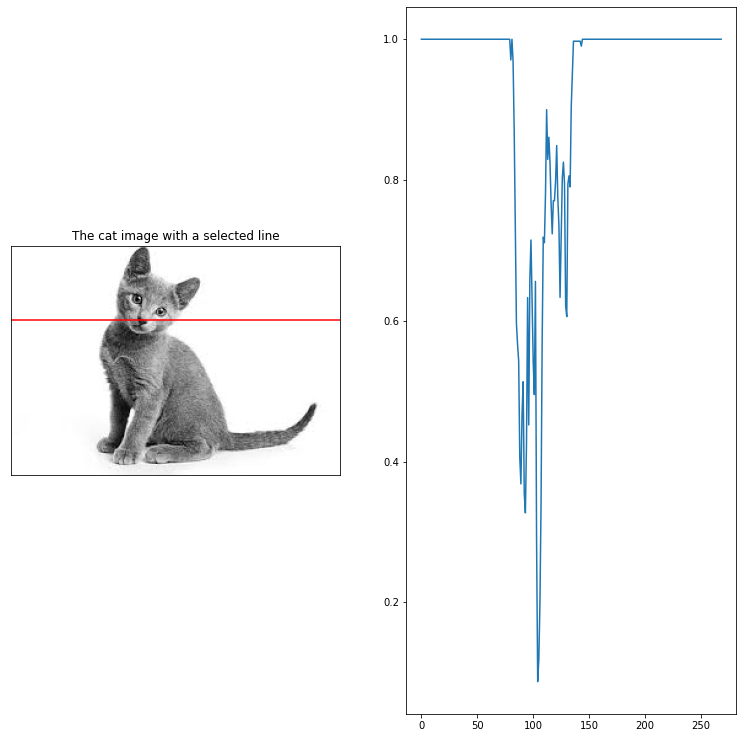

In [51]:
row = 60

print("Cat dtype:",  cat.dtype, '\t min:',  cat.min(), '\t max:', cat.max()) 

fig, ax=plt.subplots(ncols=2, figsize=(13,13))
#visualize it
ax[0].plot([0,cat.shape[1]], [row,row], color='red')
ax[0].imshow(cat, cmap='gray')
ax[0].set_title('The cat image with a selected line')
ax[0].set_xticks([])
ax[0].set_yticks([])

grey_profile = cat[row]

#visualize it
ax[1].plot( grey_profile) #Get a line and visualize it as a function.

**Explain which parts of the graphics to which parts of the image correspond to**

<IPython.core.display.Javascript object>


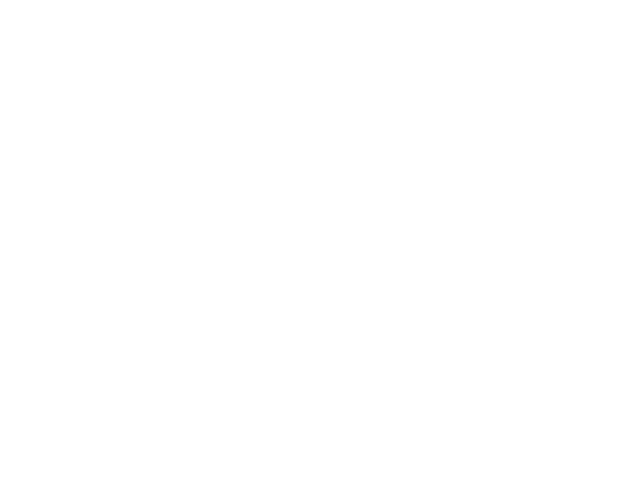

In [52]:
#what is this line doing?
%matplotlib nbagg 

import numpy as np
from mpl_toolkits.mplot3d import Axes3D

catinv = 255-cat #what is this line doing?

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:catinv.shape[0], 0:catinv.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, catinv ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)

# show it
plt.show()

# Image quality

Let's return back the image to integer

(187, 269) 	 float64 	 0.0008333333333333333 	 1.0
(187, 269) 	 uint8 		 0 			 255


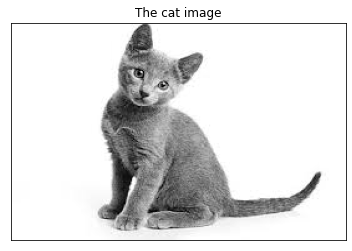

In [53]:
%matplotlib inline

from skimage.transform import rescale
print(cat.shape, '\t', cat.dtype, '\t', cat.min(), '\t', cat.max())

cati=255.0*cat
catint=cati.astype('uint8')

print(catint.shape, '\t', catint.dtype, '\t\t', catint.min(), '\t\t\t', catint.max())

#visualize it
plt.imshow(cat, cmap='gray', aspect='auto')
plt.title('The cat image')
plt.xticks([])
plt.yticks([])

plt.show()

## Spatial resolution

* Given the cat image, augment twice its spatial resolution

### Rescale, resize, and downscale
**Rescale** operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis.

**Resize** serves the same purpose, but allows to specify an output image shape instead of a scaling factor.

Note that when down-sampling an image, resize and rescale should perform Gaussian smoothing to avoid aliasing artifacts. See the anti_aliasing and anti_aliasing_sigma arguments to these functions.

**Downscale** serves the purpose of down-sampling an n-dimensional image by integer factors using the local mean on the elements of each block of the size factors given as a parameter to the function.

**Given the cat image, augment twice and reduce triple its spatial resolution**

Original cat shape 	 (187, 269) 	 dtype:  uint8 		 max:  255
Double cat shape 	 (374, 538) 	 dtype:  float64 	 max:  1.0
Triple cat shape 	  (56, 81) 	 dtype:  float64 	 max:  0.996078431372549


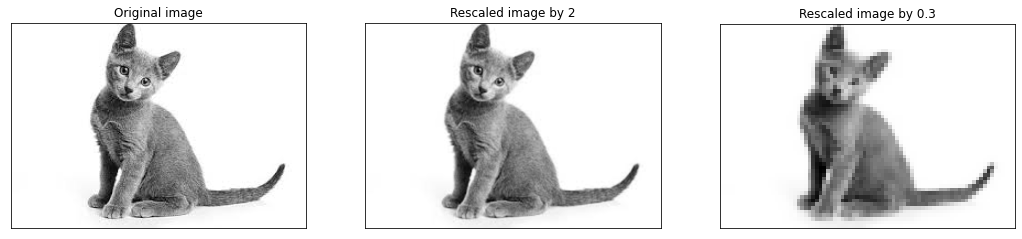

In [54]:
cat2=rescale(catint,2)
# print('catint: ', catint.shape, 'cat2: ', cat2.shape)
cat3=rescale(catint,0.3)

#Visualize it
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,3,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat2, cmap='gray')
plt.title('Rescaled image by 2')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat3, cmap='gray')
plt.title('Rescaled image by 0.3')
plt.xticks([])
plt.yticks([])


print("Original cat shape \t", catint.shape, '\t dtype: ', catint.dtype, '\t\t max: ', catint.max())
print("Double cat shape \t", cat2.shape, '\t dtype: ', cat2.dtype, '\t max: ', cat2.max())
print("Triple cat shape \t ", cat3.shape, '\t dtype: ', cat3.dtype, '\t max: ', cat3.max())
#Explain it

## Photometric resolution

**Photometric resolution depends on the number of grey levels used.**

Check the maximum and minimum value.

In [55]:
print("Max: ", catint.max(), "\t Min: ", catint.min())

Max:  255 	 Min:  0


**Reduce the resolution 10 and 25 times**

In [56]:
print('Catint dtype: \t', catint.dtype)

cat10=catint/10
print ('Cat10 dtype: \t', cat10.dtype) #Comment what occurred

cat25=catint/25
print ('Cat25 dtype: \t', cat25.dtype) #Comment what occurred



Catint dtype: 	 uint8
Cat10 dtype: 	 float64
Cat25 dtype: 	 float64


Cat10: Max:  25 	 Min:  0
Cat25: Max:  10 	 Min:  0


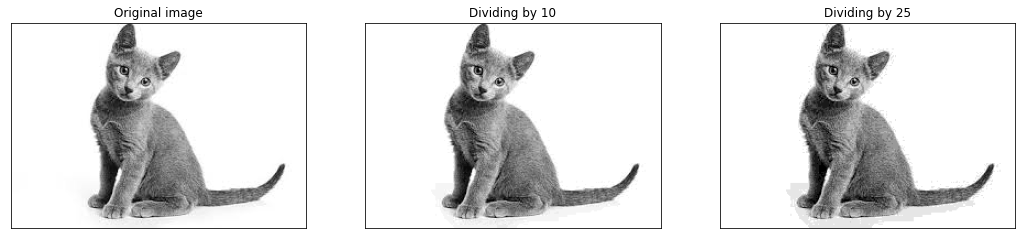

In [57]:
cat10= cat10.astype("uint8")
cat25= cat25.astype("uint8")

#visualize it
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,3,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat10, cmap='gray')
plt.title('Dividing by 10')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat25, cmap='gray')
plt.title('Dividing by 25')
plt.xticks([])
plt.yticks([])

print("Cat10: Max: ", cat10.max(), "\t Min: ", cat10.min())
print("Cat25: Max: ", cat25.max(), "\t Min: ", cat25.min())


([], [])

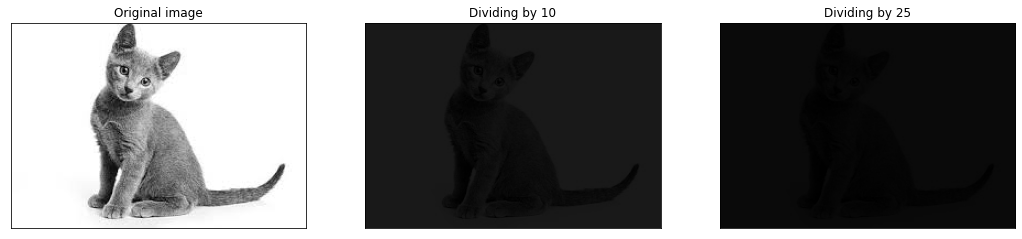

In [58]:
#What is the difference of this visualization with the one before?
fig=plt.figure(figsize=(18,8))

fig.add_subplot(1,3,1)
plt.imshow(catint, cmap='gray', vmin=0, vmax=255)
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat25, cmap='gray', vmin=0, vmax=255)
plt.title('Dividing by 25')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat10, cmap='gray', vmin=0, vmax=255)
plt.title('Dividing by 10')
plt.xticks([])
plt.yticks([])


In [59]:
#Check how many different values there are in each image
print(np.unique(catint).shape)
print(np.unique(cat10).shape)
print(np.unique(cat25).shape)

(254,)
(26,)
(11,)


## Histogram
What is it about?


**skimage.exposure.histogram(image, nbins=256, source_range='image', normalize=False)[source]**

Returns the histogram of an image.

This function returns the centers of bins and does not rebin integer arrays. For integer arrays, each integer value has its own bin, which improves speed and intensity-resolution.

The histogram is computed on the flattened image: 

**Note that for color images, the function should be used separately on each channel to obtain a histogram for each color channel.**

In [60]:
print(cat25.max())

10


In [61]:
from skimage.exposure import histogram
from skimage import img_as_float

hst = histogram(catint)
hst10 = histogram(cat10)
hst25 = histogram(cat25)
hst25inv = histogram(255-cat25) #What is it?

print (hst[1]) # hst[1]: The values at the center of the bins.
print (hst[0]) # hst[0]: The values of the histogram.

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

<BarContainer object of 11 artists>

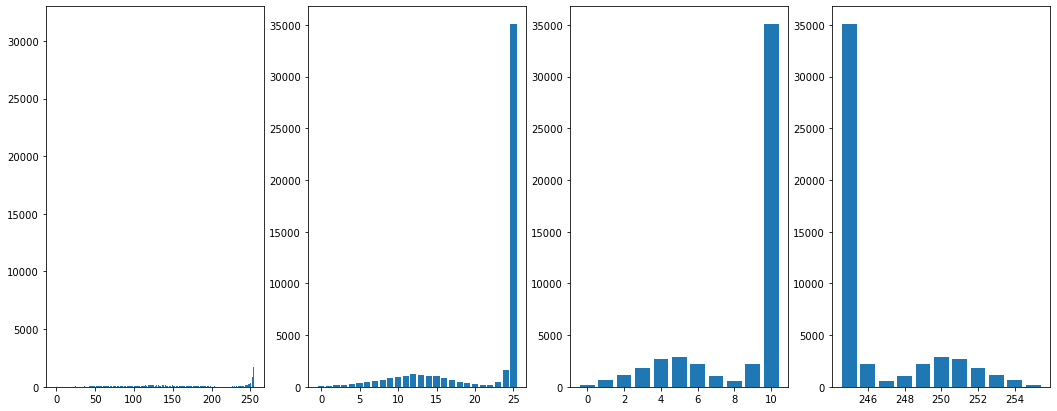

In [62]:
fig=plt.figure(figsize=(18,7))

fig.add_subplot(1,4,1)
plt.bar(hst[1],hst[0])

fig.add_subplot(1,4,2)
plt.bar(hst10[1],hst10[0])

fig.add_subplot(1,4,3)
plt.bar(hst25[1],hst25[0])

fig.add_subplot(1,4,4)
plt.bar(hst25inv[1],hst25inv[0])


In [63]:
print(cat.dtype)

print(catint.dtype)
print(cat10.dtype)
print(cat25.dtype)

float64
uint8
uint8
uint8


**Note: In order to apply properly the histogram function, it is recommended to transform the image to float**


### What are the bins in a histogram?

<BarContainer object of 4 artists>

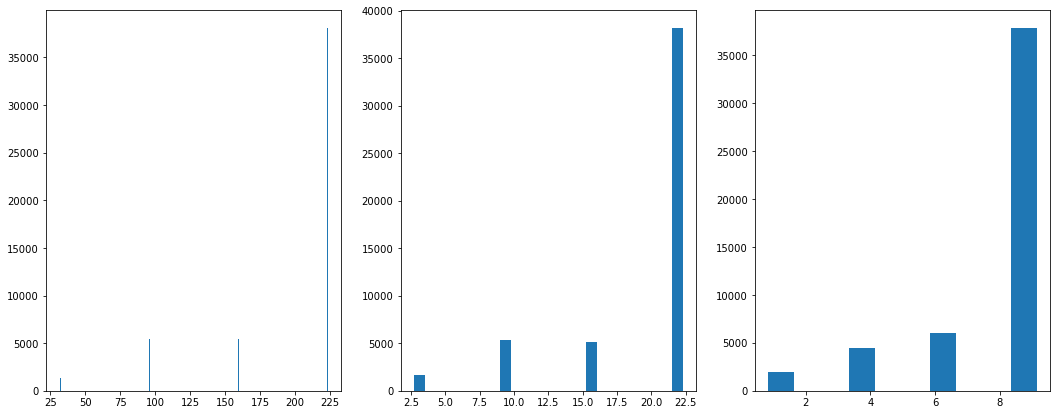

In [64]:
numberOfBins = 4

hst = histogram(catint.astype("float16"),  nbins = numberOfBins)
hst10 = histogram(cat10.astype("float16"), nbins = numberOfBins)
hst25 = histogram(cat25.astype("float16"), nbins = numberOfBins)

#visualize it
fig=plt.figure(figsize=(18,7))

fig.add_subplot(1,3,1)
plt.bar(hst[1],hst[0])

fig.add_subplot(1,3,2)
plt.bar(hst10[1],hst10[0])

fig.add_subplot(1,3,3)
plt.bar(hst25[1],hst25[0])


In [65]:
print(hst[0], hst[1])
print(hst25[0], hst25[1])

[ 1361  5455  5442 38045] [ 31.88  95.6  159.4  223.1 ]
[ 1949  4499  6064 37791] [1.25 3.75 6.25 8.75]


**What is the difference between histogram in skimage.exposure and numpy?**


In [66]:
hst = histogram(cat.astype('float'), nbins=4) # skimage.exposure
hstnp = np.histogram(cat.astype('float'), bins=4) # numpy

print(hst[0],hst[1])
print(hstnp[0],hstnp[1])


[ 1355  5435  5440 38073] [0.12572917 0.37552083 0.6253125  0.87510417]
[ 1355  5435  5440 38073] [8.33333333e-04 2.50625000e-01 5.00416667e-01 7.50208333e-01
 1.00000000e+00]


(187, 269, 3)


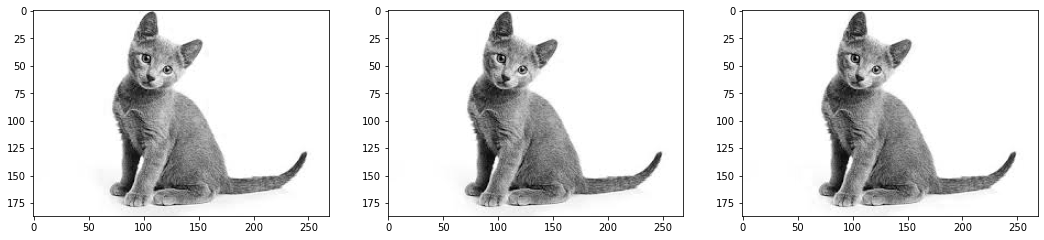

In [67]:

print(catRGB.shape)

fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,3,1)
plt.imshow(catRGB[:,:,0],cmap='gray')

fig.add_subplot(1,3,2)
plt.imshow(catRGB[:,:,1],cmap='gray')

fig.add_subplot(1,3,3)
plt.imshow(catRGB[:,:,2],cmap='gray')

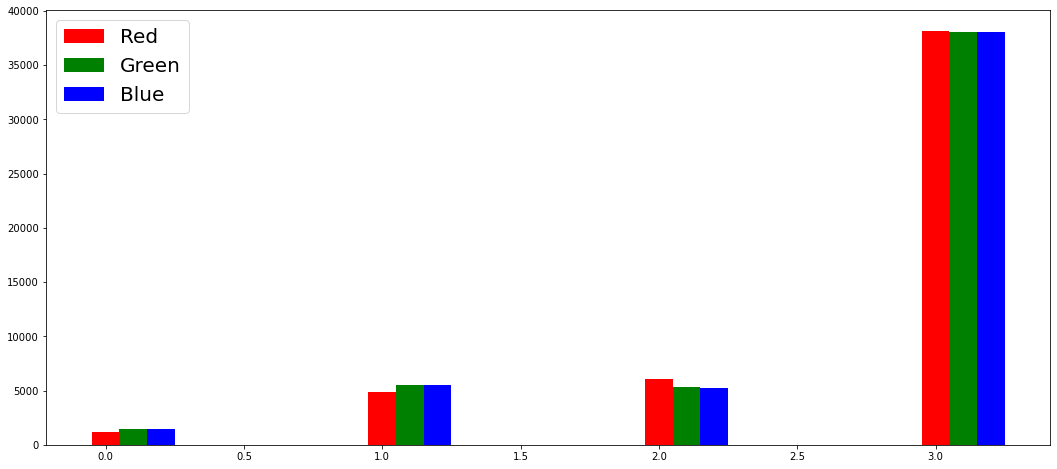

In [68]:
numberOfBins = 4

hst_r, bins_r = histogram( img_as_float(catRGB[:,:,0]), nbins=numberOfBins)
hst_g, bins_g = histogram( img_as_float(catRGB[:,:,1]), nbins=numberOfBins)
hst_b, bins_b = histogram( img_as_float(catRGB[:,:,2]), nbins=numberOfBins)

ind = np.arange( numberOfBins)

fig = plt.figure(figsize=(18,8))
cl_r = plt.bar( ind, hst_r, 0.1, color='r')
cl_g = plt.bar( ind+.1, hst_g,0.1, color='g')
cl_b = plt.bar( ind+.2, hst_b,0.1, color='b')
plt.legend((cl_r[0], cl_g[0], cl_b[0]), ('Red','Green','Blue'), loc=2, prop={'size': 20})
plt.show()


## Convolution

**Let's smooth an image.** For this purpose, use a convolution. 
What is a convolution?

Each value in result is $C_i = \sum_j{I_{i+j-k} W_j}$, where $W$ is the weights kernel, $j$ is the n-D spatial index over $W$, $I$ is the input and $k$ is the coordinate of the center of $W$, specified by origin in the input parameters.


Multi-dimensional convolution:
**skimage.filter.edges.convolve(input, weights, output=None, mode='reflect')**

**What mask can we define?**

**How to treat the borders?**

The simplest case to understand is mode='constant', cval=0.0, because in this case borders (i.e. where the weights kernel, centered on any one value, extends beyond an edge of input.


[[0.2 0.2 0.2 0.2 0.2]]


([], [])

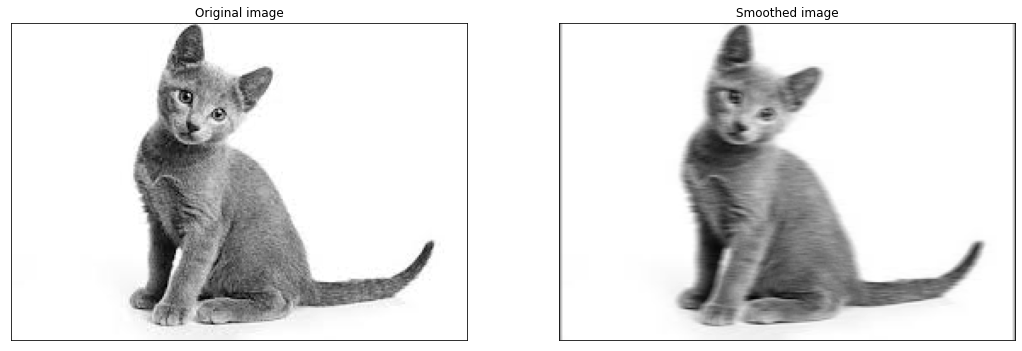

In [69]:
from scipy.ndimage import convolve

mask=np.array([[1,1,1,1,1]])
mask=mask/np.sum(mask) #Why?
print(mask)

cat_smooth = convolve(catint, mask, mode='constant', cval=0.0)

#visualize
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,2,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_smooth, cmap='gray')
plt.title('Smoothed image')
plt.xticks([])
plt.yticks([])


**What would happen if we don't normalize the mask?**

[[1 1 1 1 1]]


([], [])

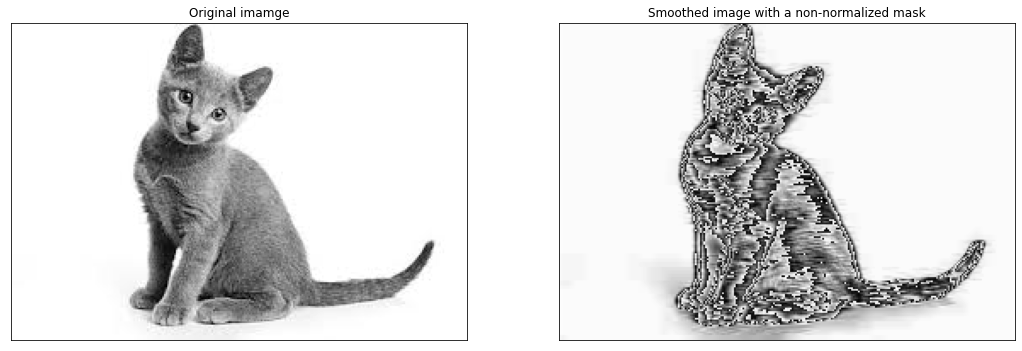

In [70]:
mask=np.array([[1,1,1,1,1]])
print(mask)

cat_smooth_no_norm = convolve(catint, mask, mode='constant', cval=0.0)

#visualize it
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,2,1)
plt.imshow(cat, cmap='gray')
plt.title('Original imamge')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_smooth_no_norm, cmap='gray')
plt.title('Smoothed image with a non-normalized mask')
plt.xticks([])
plt.yticks([])

**Can we use a bigger mask?**
What would be the difference?

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]


([], [])

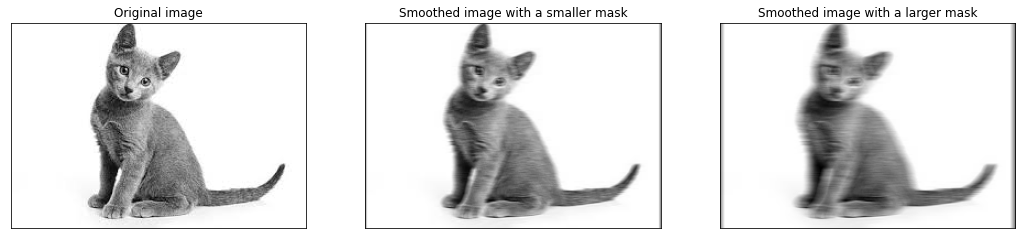

In [71]:
mask = np.array([[1,1,1,1,1,1,1,1,1,1]])
mask = mask/np.sum(mask)
print(mask)

cat_smoother = convolve(catint, mask, mode='constant', cval=0.0)

#Visualize 
fig = plt.figure(figsize=(18,9))

fig.add_subplot(1,3,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat_smooth, cmap='gray')
plt.title('Smoothed image with a smaller mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat_smoother, cmap='gray')
plt.title('Smoothed image with a larger mask')
plt.xticks([])
plt.yticks([])

<IPython.core.display.Javascript object>


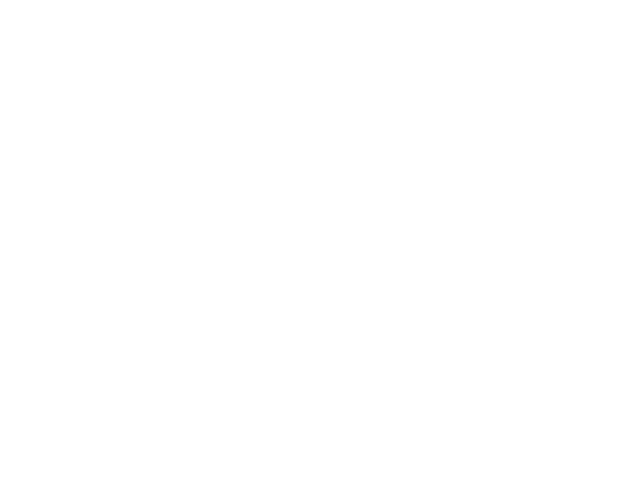

<IPython.core.display.Javascript object>


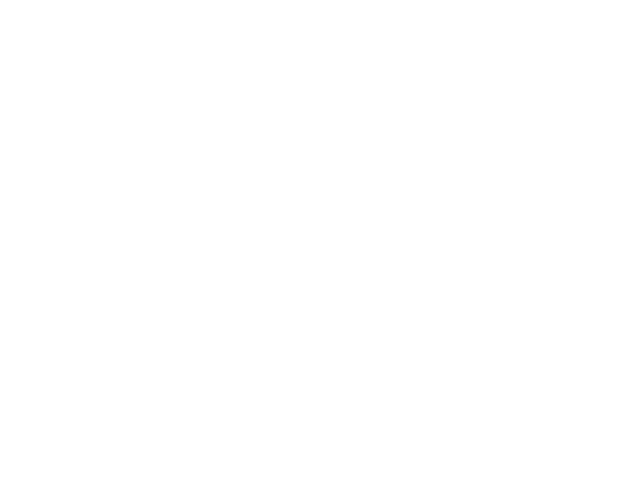

<IPython.core.display.Javascript object>


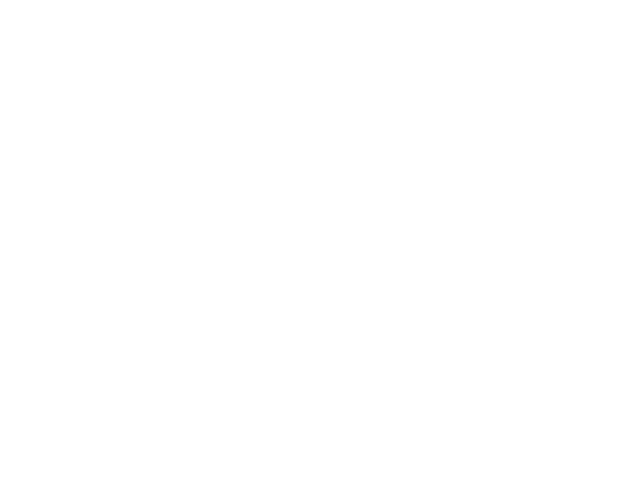

In [72]:
%matplotlib nbagg 

# generate some sample data
catinv = 255-catint
cat_smooth_inv = 255-cat_smooth
cat_smoother_inv = 255-cat_smoother

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:catinv.shape[0], 0:catinv.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, catinv ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, cat_smooth_inv ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, cat_smoother_inv ,rstride=1, cstride=1, cmap=plt.cm.gray,
        linewidth=0)
plt.show()

[[0.03846154 0.15384615 0.61538462 0.15384615 0.03846154]]


([], [])

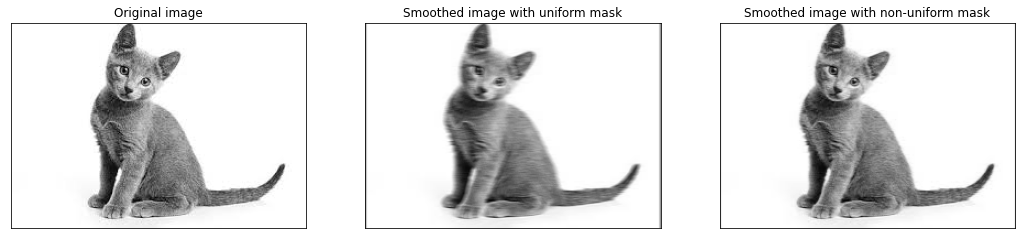

In [73]:
#Use non-uniform mask

%matplotlib inline

mask_non_uniform = np.array([[1,4,16,4,1]])
mask_non_uniform = mask_non_uniform/np.sum(mask_non_uniform)

print(mask_non_uniform)

cat_smooth_nonuniform = convolve(catint, mask_non_uniform, mode='constant', cval=0.0)

#visualize
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,3,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat_smooth, cmap='gray')
plt.title('Smoothed image with uniform mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat_smooth_nonuniform, cmap='gray')
plt.title('Smoothed image with non-uniform mask')
plt.xticks([])
plt.yticks([])



[ 52  41   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   2
   0 253   3  15  19 254 239 248 234 249  20  11 253 247 246 255  16   7
 244   1  11 251 250   8 253 236  17 250 224  11  24   0 244  10  15 255
 245 242   1   7 255 250 255   5   4   4   1 251   3   1 252   6   2   0
 252   0 253 253   1   4   5 253 250 255   0 251 253   5   7   0   0   1
 249 252   2   3   1   0   3   3 251 252   0   1 246 242   6  13   6   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

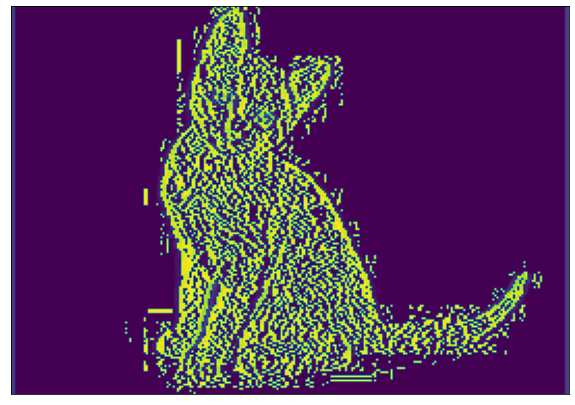

In [74]:
#Check on a line the effect of different masks

cat_line = catint[101]
cat_smooth_line = cat_smooth[101]
cat_nonuniform_line = cat_smooth_nonuniform[101]

print(cat_nonuniform_line-cat_smooth_line)

plt.figure(figsize=(10,10))
plt.imshow(cat_smooth_nonuniform - cat_smooth)
plt.xticks([])
plt.yticks([])
plt.show()



## Noise

**What kind of image noise do you know?**



([], [])

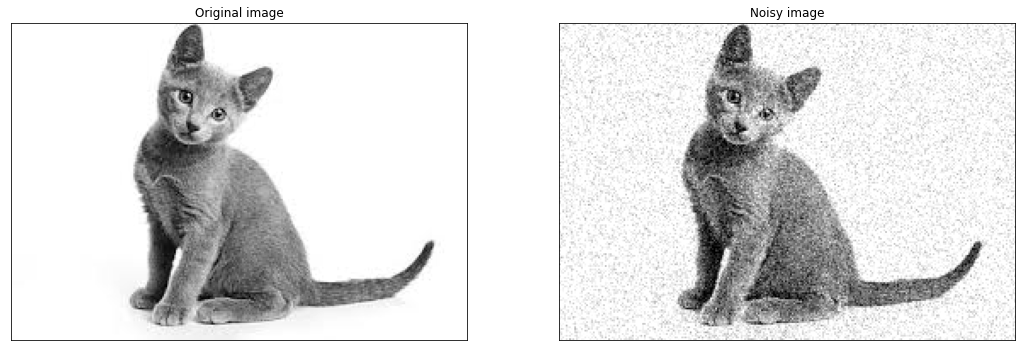

In [75]:
from skimage.util import random_noise # Generates Gaussian noise

cat_noisy = random_noise(catint, mean=0, var=0.01) 

#Visualize it
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,2,1)
plt.imshow(cat, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_noisy, cmap='gray')
plt.title('Noisy image')
plt.xticks([])
plt.yticks([])


In [76]:
print(mask)
print(mask_non_uniform)

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[[0.03846154 0.15384615 0.61538462 0.15384615 0.03846154]]


Smooth the noisy image

([], [])

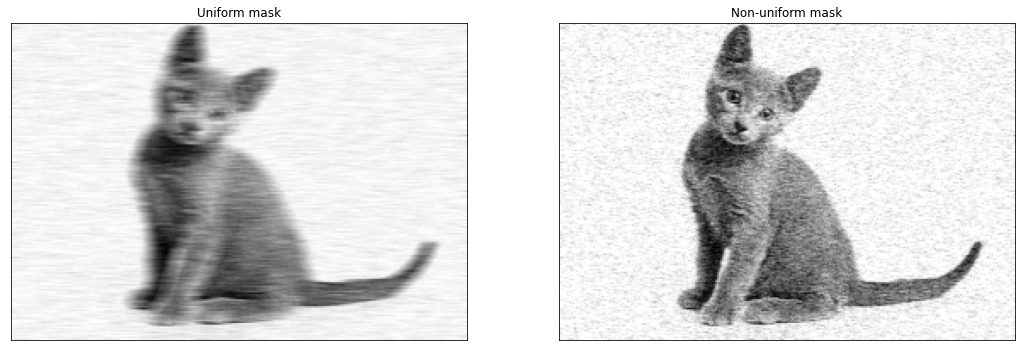

In [77]:
cat_noisy_smooth = convolve(cat_noisy, mask)
cat_noisy_smooth_nonuniform = convolve(cat_noisy, mask_non_uniform)

#visualize it
fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,2,1)
plt.imshow(cat_noisy_smooth, cmap='gray')
plt.title('Uniform mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_noisy_smooth_nonuniform, cmap='gray')
plt.title('Non-uniform mask')
plt.xticks([])
plt.yticks([])


## What is the Gaussian filter? Why is it interesting?

The **multi-dimensional Gaussian filter** function is:

[skimage.filters.gaussian(image, sigma=1, output=None, mode='nearest', cval=0, multichannel=None, preserve_range=False, truncate=4.0))](https://scikit-image.org/docs/0.12.x/api/skimage.filters.html)

This function is a wrapper around scipy.ndi.gaussian_filter().

Integer arrays are converted to float.

The output should be floating point data type since gaussian converts to float provided image. If output is not provided, another array will be allocated and returned as the result.

The multi-dimensional filter is implemented as a sequence of one-dimensional convolution filters. The intermediate arrays are stored in the same data type as the output. Therefore, for output types with a limited precision, the results may be imprecise because intermediate results may be stored with insufficient precision.

7.8571424976336e-07 0.0063667085089244325 float64


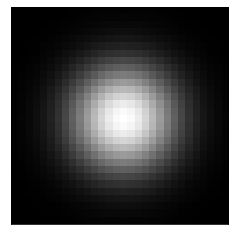

In [78]:
from skimage.filters import gaussian

a = np.zeros((30, 30))
a[15, 15] = 1

gs = gaussian(a, sigma=5)
print(gs.min(), gs.max(), gs.dtype) # check max and min values!

plt.imshow( gs, cmap='gray')
#plt.imshow( gs, cmap='gray', vmin=0, vmax=1)
plt.xticks([])
plt.yticks([])
plt.show()

([], [])

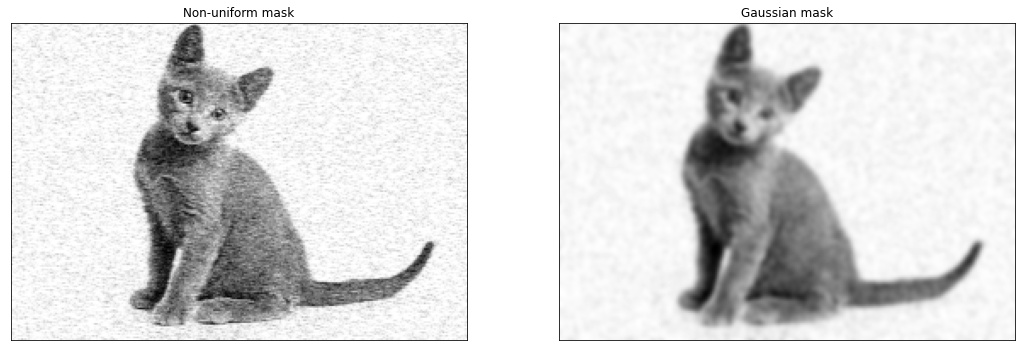

In [79]:
cat_noisy_gaussian = gaussian(cat_noisy, sigma=1.5)

#visualize it
fig=plt.figure(figsize=(18,8))

fig.add_subplot(1,2,1)
plt.imshow(cat_noisy_smooth_nonuniform, cmap='gray')
plt.title('Non-uniform mask')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,2,2)
plt.imshow(cat_noisy_gaussian, cmap='gray')
plt.title('Gaussian mask')
plt.xticks([])
plt.yticks([])

**Check the effect of different sigma parameters?**

([], [])

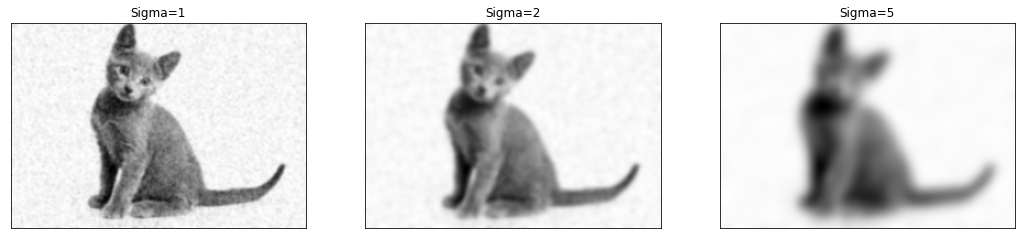

In [80]:
cat_noisy_gaussian1 = gaussian(cat_noisy, sigma=1)
cat_noisy_gaussian2 = gaussian(cat_noisy, sigma=2)
cat_noisy_gaussian5 = gaussian(cat_noisy, sigma=5)


fig=plt.figure(figsize=(18,8))

fig.add_subplot(1,3,1)
plt.imshow(cat_noisy_gaussian1, cmap='gray')
plt.title('Sigma=1')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow(cat_noisy_gaussian2, cmap='gray')
plt.title('Sigma=2')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow(cat_noisy_gaussian5, cmap='gray')
plt.title('Sigma=5')
plt.xticks([])
plt.yticks([])


## What is the median filter?

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


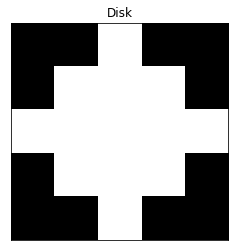

In [81]:
from skimage.filters import median
from skimage.morphology import disk

radius = 2

print(disk(radius))

plt.imshow(disk(radius), cmap='gray')
plt.title('Disk')
plt.xticks([])
plt.yticks([])
plt.show()

Original image:  Min: 0.0 	 Max:  1.0
Median image: 	 Min: 0.0 	 Max:  0.0
Mean image: 	 Min: 0.0 	 Max:  0.07692307692307693


([], [])

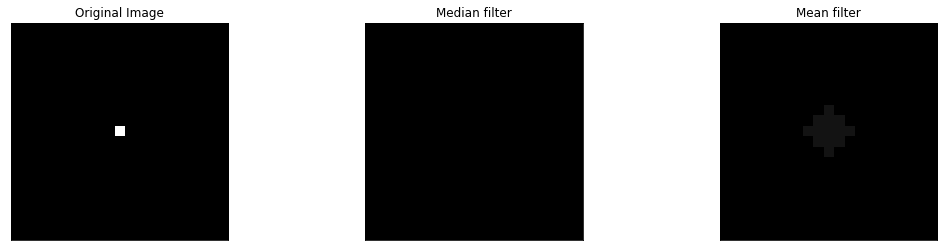

In [82]:
a = np.zeros((21, 21))
a[10, 10] = 1
print('Original image:  Min:', a.min(), '\t Max: ', a.max())

md = median(a, disk(radius))
print('Median image: \t Min:', md.min(), '\t Max: ', md.max())

D = disk(radius)
D=D/D.sum()
mn = convolve(a,D)
print('Mean image: \t Min:', mn.min(), '\t Max: ', mn.max())

fig=plt.figure(figsize=(18,4))

fig.add_subplot(1,3,1)
plt.imshow(a, cmap='gray')
plt.title('Original Image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,2)
plt.imshow( md, cmap='gray', vmin=0, vmax=1)
plt.title('Median filter')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,3,3)
plt.imshow( mn, cmap='gray', vmin=0, vmax=1)
plt.title('Mean filter')
plt.xticks([])
plt.yticks([])

Text(0.5, 1.0, 'Median filtering')

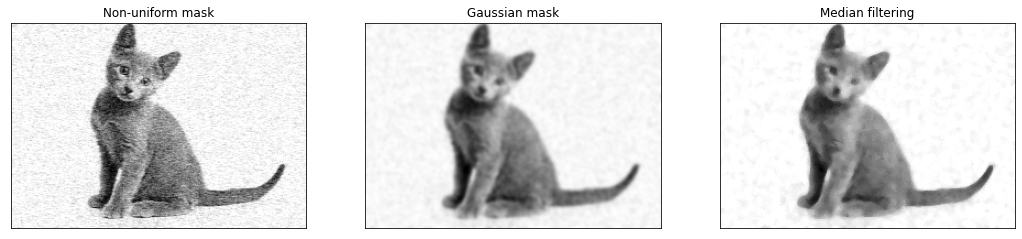

In [83]:
cat_noisy_median = median(cat_noisy, disk(3))

#visualize it
fig = plt.figure(figsize=(18,8))

fig.add_subplot(1,3,1)
plt.imshow(cat_noisy_smooth_nonuniform, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Non-uniform mask')

fig.add_subplot(1,3,2)
plt.imshow(cat_noisy_gaussian, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Gaussian mask')

fig.add_subplot(1,3,3)
plt.imshow(cat_noisy_median, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Median filtering')

How is the median and mean filter affecting the **salt&paper** noisy images?

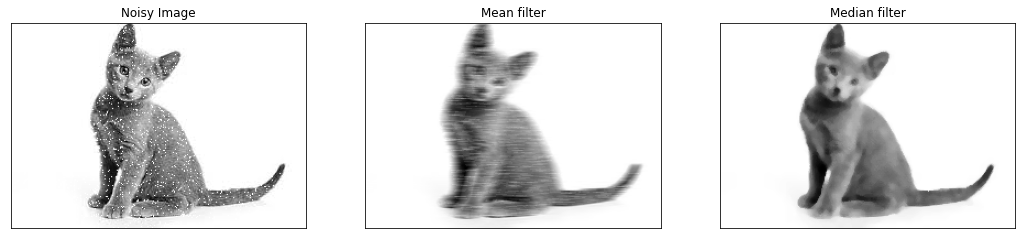

In [84]:
#introducing impulse noise
cat_noisy_sp = random_noise(cat,mode='salt')

cat_noisy_mean = convolve(cat_noisy_sp, mask)
cat_noisy_median = median(cat_noisy_sp, disk(3))


fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(18, 8))

for ax, img, title in zip(
        axes,
        [cat_noisy_sp, cat_noisy_mean, cat_noisy_median],
        ['Noisy Image', 'Mean filter', 'Median filter']
):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

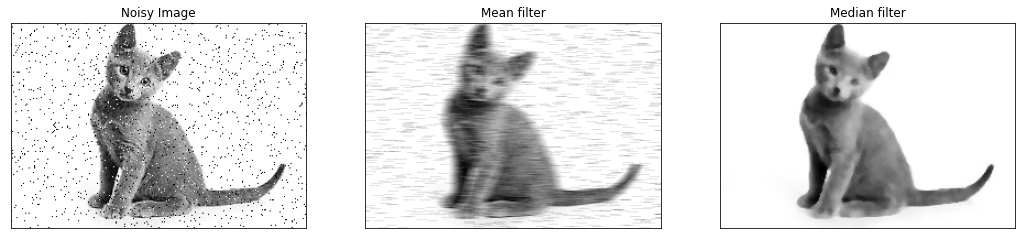

In [85]:
#introducing salt and paper noise
cat_noisy_sp = random_noise(cat,mode='s&p')

cat_noisy_mean = convolve(cat_noisy_sp, mask)
cat_noisy_median = median(cat_noisy_sp, disk(3))

#visualize it
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(18, 8))

for ax, img, title in zip(
        axes,
        [cat_noisy_sp, cat_noisy_mean, cat_noisy_median],
        ['Noisy Image', 'Mean filter', 'Median filter']
):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

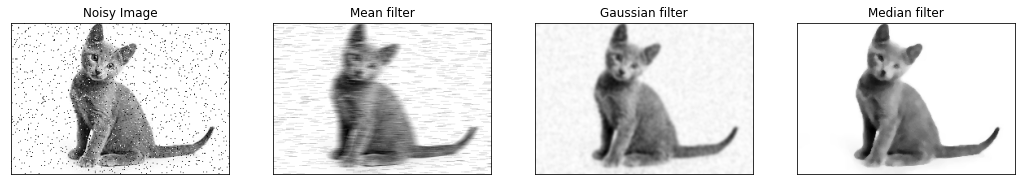

In [86]:
# Comparing mean, Gaussian and median filters
fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(18, 8))

for ax, img, title in zip(
        axes,
        [cat_noisy_sp, cat_noisy_mean, cat_noisy_gaussian, cat_noisy_median],
        ['Noisy Image', 'Mean filter', 'Gaussian filter', 'Median filter']
):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.set_yticks([])
    ax.set_xticks([])

plt.show()

**Exercise:** Apply the same operations on color images